# First, we import necessary package
Then, we iterate through the html

In [1]:
from bs4 import BeautifulSoup
import requests
from lxml import html

In [2]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

In [3]:
soup = BeautifulSoup(source, "lxml")

In [4]:
table = soup.find('table', {'class':'wikitable sortable'})
len(table.findAll('td'))

861

# For looping to append the text into a raw list
for some reason if you put the range 862, it will show an error since it exceeds the size of the list. The correct way probably to use the + 1 loop and break the loop until it reach the end to prevent error, but i found that using 861 range which is the size of the original list didn't return an error. The items inside the list itself also the same as wikipedia, so I will use this method.

In [5]:
list_raw = []
y = table.findAll('td')
for n in range(0, 861):
    x = y[n].text
    list_raw.append(x)

In [6]:
list_raw

['M1A',
 'Not assigned',
 'Not assigned\n',
 'M2A',
 'Not assigned',
 'Not assigned\n',
 'M3A',
 'North York',
 'Parkwoods\n',
 'M4A',
 'North York',
 'Victoria Village\n',
 'M5A',
 'Downtown Toronto',
 'Harbourfront\n',
 'M6A',
 'North York',
 'Lawrence Heights\n',
 'M6A',
 'North York',
 'Lawrence Manor\n',
 'M7A',
 'Downtown Toronto',
 "Queen's Park\n",
 'M8A',
 'Not assigned',
 'Not assigned\n',
 'M9A',
 "Queen's Park",
 'Not assigned\n',
 'M1B',
 'Scarborough',
 'Rouge\n',
 'M1B',
 'Scarborough',
 'Malvern\n',
 'M2B',
 'Not assigned',
 'Not assigned\n',
 'M3B',
 'North York',
 'Don Mills North\n',
 'M4B',
 'East York',
 'Woodbine Gardens\n',
 'M4B',
 'East York',
 'Parkview Hill\n',
 'M5B',
 'Downtown Toronto',
 'Ryerson\n',
 'M5B',
 'Downtown Toronto',
 'Garden District\n',
 'M6B',
 'North York',
 'Glencairn\n',
 'M7B',
 'Not assigned',
 'Not assigned\n',
 'M8B',
 'Not assigned',
 'Not assigned\n',
 'M9B',
 'Etobicoke',
 'Cloverdale\n',
 'M9B',
 'Etobicoke',
 'Islington\n',
 'M9B

Clean up the paragraphing mess by \n with .replace, then make a new list

In [7]:
new_list = [x.replace('\n', '') for x in list_raw]

In [8]:
Postcode = new_list[0::3]
Borough = new_list[1::3]
Neighborhood = new_list[2::3]

Check the length to see if it is the same size for each columns

In [9]:
print(len(Postcode))
print(len(Borough))
print(len(Neighborhood))

287
287
287


# Finally, cast it to data frame and do all the task in coursera to get the intended result

In [10]:
import pandas as pd

DataFrame = {'Postcode': Postcode, 'Borough': Borough, 'Neighborhood': Neighborhood}

df = pd.DataFrame(data=DataFrame, columns=['Postcode', 'Borough', 'Neighborhood'], index=None)
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [11]:
df.drop(df.index[df['Borough'] == 'Not assigned'], inplace = True)
df = df.reset_index(drop=True)
df.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [12]:
df = df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(','.join).reset_index()
df.columns = ['Postcode','Borough','Neighborhood']
df.head(10)

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [13]:
df.loc[df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = df['Borough']

In [14]:
df.shape

(103, 3)

In [15]:
df[df['Borough'] == "Queen's Park"]

,Postcode,Borough,Neighborhood
93,M9A,Queen's Park,Queen's Park


In [16]:
df.sort_values(by = 'Postcode', ascending = True, inplace = True)

# Let's check the first 40 data to see whether the task has been fulfilled
**Please take note that the wikipedia link got updated,** that's why if you see the steps in coursera that said M5A is listed twice and has two neighborhoods which are Harbourfront and Regent Park you won't find it in the current link since right now M5A only have one Neighborhod. One of the staff said to see M1C instead as an example for joining neighbood.

In [17]:
df.head(40)

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


# Next, let's find the latitude and longitude
pardon me, i'm using different method from the course tips

In [18]:
import geocoder
from geopy.geocoders import Nominatim

In [19]:
list_postcode = df['Postcode'].values.tolist()
len(list_postcode)

103

In [20]:
latitude_list = []
longitude_list = []

for n in list_postcode:
    g = geocoder.arcgis(f'{n}, Toronto, Ontario').latlng
    print(g)
    latitude_list.append(g[0])
    longitude_list.append(g[1])

[43.811525000000074, -79.19551746399998]
[43.78566500000005, -79.15872457299997]
[43.76581500000003, -79.17519294699997]
[43.768369121000035, -79.21758999999997]
[43.76968799900004, -79.23943999999995]
[43.74312500000008, -79.23174973599998]
[43.72627568400003, -79.26362499999993]
[43.71305350000006, -79.28505499999994]
[43.724234575000025, -79.22792499999997]
[43.69677000000007, -79.25996735299998]
[43.759975000000054, -79.26897418299995]
[43.750710464000065, -79.30055999999996]
[43.79394000000008, -79.26797613999997]
[43.78472500000004, -79.29906603299997]
[43.81768500000004, -79.28018721399997]
[43.80088292800008, -79.32073999999994]
[43.83421500000003, -79.21670085099998]
[43.80284500000005, -79.35620744999994]
[43.780970000000025, -79.34781328099996]
[43.781015000000025, -79.38052867199997]
[43.75709511900004, -79.38031999999998]
[43.79147500000005, -79.41360487299994]
[43.76816500000007, -79.40741984599998]
[43.74789500000003, -79.39991893899997]
[43.77769500000005, -79.445796572

In [23]:
df['Latitude'] = latitude_list

In [24]:
df['Longitude'] = longitude_list

### At the code below, I'm checking the tail to see whether the join method is correct and also to check the M9A postcode is the same with the course tips

In [32]:
df.tail(50)

,Postcode,Borough,Neighborhood,Latitude,Longitude
53,M5A,Downtown Toronto,Harbourfront,43.650295,-79.359166
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657363,-79.378180
55,M5C,Downtown Toronto,St. James Town,43.651210,-79.375481
56,M5E,Downtown Toronto,Berczy Park,43.645160,-79.373675
57,M5G,Downtown Toronto,Central Bay Street,43.656091,-79.384930
58,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.649700,-79.382582
59,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.630210,-79.362433
60,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647100,-79.381531
61,M5L,Downtown Toronto,"Commerce Court,Victoria Hotel",43.648395,-79.378865
62,M5M,North York,"Bedford Park,Lawrence Manor East",43.735460,-79.419148


In [36]:
#in case something went wrong
df.to_csv('original sorted dataframe toronto.csv')

# Clustering section
This is the longest part, please bear in mind that I'm using the same method like the course lab in clustering New York

In [35]:
import numpy as np
#panda option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
print('libraries imported')

libraries imported


In [33]:
sort_borough = df['Borough'].unique()
print(sort_borough)

['Scarborough' 'North York' 'East York' 'East Toronto' 'Central Toronto'
 'Downtown Toronto' 'York' 'West Toronto' 'Mississauga' 'Etobicoke'
 "Queen's Park"]


In [41]:
#Just checking
print(len(sort_borough))
print(df.shape[0])

11
103


### Use nominatim to find the coordinate of toronto and then make the map

In [44]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="dora_the_explorer", timeout=10)
location = geolocator.geocode(address)
toronto_latitude = location.latitude
toronto_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(toronto_latitude, toronto_longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [45]:
map_toronto = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## In this part, I use the same step as the previous course lab about clustering NY with the data of venues from foursquared
The course said we can use just boroughs that contain the word toronto, but in this notebook I used all the data. (the course said it is up to us)

In [46]:
CLIENT_ID = '5ZGZU1PLAMVLBQKNFNJ4AIYKWTO1X5KPMMYGVWHKZVT3N5Q0' # your Foursquare ID
CLIENT_SECRET = '5YCZFISNTGJPMULFS1E0V5GP4WICNOCBRMU4AYT1U4XYVE1P' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5ZGZU1PLAMVLBQKNFNJ4AIYKWTO1X5KPMMYGVWHKZVT3N5Q0
CLIENT_SECRET:5YCZFISNTGJPMULFS1E0V5GP4WICNOCBRMU4AYT1U4XYVE1P


In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,Indi

In [52]:
#Just checking
toronto_venues.shape

(2466, 7)

In [53]:
#Just checking
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge,Malvern",43.811525,-79.195517,Straits Aqualife Limited,43.809268,-79.199399,Pet Store
1,"Rouge,Malvern",43.811525,-79.195517,Canadian Appliance Source Whitby,43.808353,-79.191331,Home Service
2,"Highland Creek,Rouge Hill,Port Union",43.785665,-79.158725,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
3,"Highland Creek,Rouge Hill,Port Union",43.785665,-79.158725,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Guildwood,Morningside,West Hill",43.765815,-79.175193,Homestead Roofing Repair,43.765140,-79.178663,Construction & Landscaping


## Check how many venues returned from each neighborhood

In [54]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Agincourt,14,14,14,14,14,14
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",2,2,2,2,2,2
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",15,15,15,15,15,15
"Alderwood,Long Branch",4,4,4,4,4,4
"Bathurst Manor,Downsview North,Wilson Heights",1,1,1,1,1,1
Bayview Village,3,3,3,3,3,3
"Bedford Park,Lawrence Manor East",22,22,22,22,22,22
Berczy Park,62,62,62,62,62,62


total of unique venues category

In [56]:
len(toronto_venues['Venue Category'].unique())

266

## Make the dummies with one hot encoding

In [99]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']
print(toronto_onehot.shape)
fixed_columns = [toronto_onehot.columns[181]] + list(toronto_onehot.columns[0:181]) + list(toronto_onehot.columns[182:])
toronto_onehot = toronto_onehot[fixed_columns]

(2466, 266)


In [133]:
#Just checking
toronto_onehot.tail(50)

,Neighborhood,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
2416,"Cloverdale,Islington,Martin Grove,Princess Gar...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [102]:
#Just checking
toronto_onehot.shape

(2466, 266)

### group rows by neighborhood by taking the mean of the frequency of occurrence of each category

In [103]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.0,0.03,0.0,0.01,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.03,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.02,0.0,0.01,0.03,0.0,0.0,0.0,0.0,0.01,0.03,0.01

In [259]:
#just checking the new shape
toronto_grouped.shape

(99, 266)

 ### neighborhood along with the top 5 most common venues

In [105]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
         venue  freq
0  Coffee Shop  0.07
1         Café  0.06
2        Hotel  0.04
3   Steakhouse  0.04
4   Restaurant  0.03


----Agincourt----
                  venue  freq
0         Shopping Mall  0.14
1    Chinese Restaurant  0.14
2  Hong Kong Restaurant  0.07
3           Supermarket  0.07
4        Discount Store  0.07


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
                        venue  freq
0                    Pharmacy   1.0
1           Afghan Restaurant   0.0
2  Modern European Restaurant   0.0
3                 Music Venue   0.0
4                 Music Store   0.0


----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                 venue  freq
0        Grocery Store  0.13
1  Fried Chicken Joint  0.07
2  Japanese Restaurant  0.07
3             Pharmacy  0.07
4                 Park  0.07


----Alderwood,Long Branch----
                 venue  freq
0         Dance

4           Afghan Restaurant  0.00


----Harbord,University of Toronto----
        venue  freq
0        Café  0.09
1  Restaurant  0.06
2      Bakery  0.06
3         Gym  0.04
4         Bar  0.04


----Harbourfront----
           venue  freq
0    Coffee Shop  0.12
1         Bakery  0.07
2        Theater  0.05
3  Boat or Ferry  0.05
4       Gym Pool  0.02


----Harbourfront East,Toronto Islands,Union Station----
               venue  freq
0               Park  0.33
1               Pier  0.33
2    Harbor / Marina  0.33
3  Afghan Restaurant  0.00
4        Music Store  0.00


----High Park,The Junction South----
                                      venue  freq
0                            Sandwich Place  0.25
1                                      Park  0.25
2                         Convenience Store  0.25
3  Residential Building (Apartment / Condo)  0.25
4                   New American Restaurant  0.00


----Highland Creek,Rouge Hill,Port Union----
                        venue  freq
0

### Function to return the most common venues

In [106]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [248]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Hotel,Breakfast Spot,Asian Restaurant,Bar,Gym,Gastropub,Restaurant
1,Agincourt,Shopping Mall,Chinese Restaurant,Sushi Restaurant,Park,Vietnamese Restaurant,Supermarket,Hong Kong Restaurant,Grocery Store,Skating Rink,Pool
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Pharmacy,Yoga Studio,Fast Food Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Pizza Place,Japanese Restaurant,Sandwich Place,Coffee Shop,Fried Chicken Joint,Caribbean Restaurant,Liquor Store,Beer Store,Pharmacy
4,"Alderwood,Long Branch",Convenience Store,Dance Studio,Pub,Gym,Fish Market,Fish & Chips Shop,Fireworks Store,Flea Market,Field,Electronics Store


### Before we go to K means, I searched for a method to calculate the optimum K. Fortunately, I saw someone posted about silhouette method, so I'm using that to check the optimum K

In [249]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 25
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean'))

In [221]:
len(sil)

24

In [250]:
K = [k for k in range(2,26)]

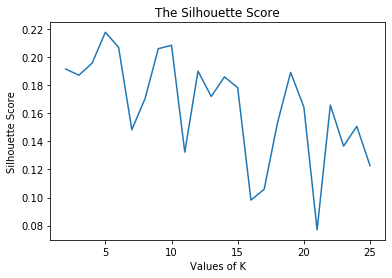

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(K, sil) 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('The Silhouette Score') 
plt.show() 

### It seems the optimum K is 5, so let's use it for K means clustering

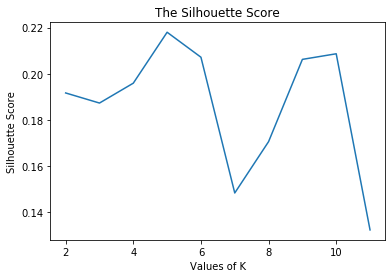

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(K[0:10], sil[0:10]) 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('The Silhouette Score') 
plt.show() 

In [253]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 1, 0, 0, 0, 0])

### merge the data

In [254]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(20)

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge,Malvern",43.811525,-79.195517,0.0,Home Service,Pet Store,Yoga Studio,Farmers Market,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Field
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.785665,-79.158725,0.0,Bar,Construction & Landscaping,Yoga Studio,Farmers Market,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.765815,-79.175193,0.0,Park,Construction & Landscaping,Bus Stop,Gym / Fitness Center,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
3,M1G,Scarborough,Woburn,43.768369,-79.217590,0.0,Korean Restaurant,Soccer Field,Park,Business Service,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
4,M1H,Scarborough,Cedarbrae,43.769688,-79.239440,4.0,Playground,Electronics Store,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fireworks Store,Field,Fast Food Restaurant,Farmers Market
5,M1J,Scarborough,Scarborough Village,43.743125,-79.231750,0.0,Grocery Store,Train Station,Restaurant,Indian Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Yoga Studio
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.726276,-79.263625,0.0,Discount Store,Convenience Store,Department Store,Coffee Shop,Yoga Studio,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.713054,-79.285055,0.0,Bus Line,Intersection,Bakery,Bus Station,Soccer Field,Coffee Shop,Metro Station,Farmers Market,Event Space,Falafel Restaurant
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.724235,-79.227925,0.0,Discount Store,Coffee Shop,Bistro,Bank,Gift Shop,Sandwich Place,Pharmacy,Field,Fast Food Restaurant,Farmers Market
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.696770,-79.259967,0.0,General Entertainment,Gym Pool,Skating Rink,Park,Gym,College Stadium,Fast Food Restaurant,Farmers Market,Field,Eastern European Restaurant


### I drop the NaN Value since it will make an error when making the map. Furthermore, changing the type of data seems necessary to get the color label

In [255]:
toronto_merged['Cluster Labels'].isna().sum()

3

In [256]:
toronto_merged.dropna(axis=0, inplace=True)
toronto_merged['Cluster Labels'].isna().sum()

0

In [257]:
#Just checking the data type
toronto_merged.astype({'Cluster Labels':'int32'}).dtypes

Postcode                   object
Borough                    object
Neighborhood               object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

# Finally, I can make the map

In [258]:
# create map
map_clusters = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
      
map_clusters

## This section is just to examine each cluster and determine the discriminating venue categories that distinguish each cluster
(Note: you can also see the borough by changing the toronto_merged.columns to [1])

From the results, it turns out many neighborhoods are put to label 0, I assumed this is because the neighborhood was clustered based on the frequency of cafes, restaurants and other similar recurring venues. The rest of the label seems have their own unique most common venue within the neighborhood.

As for why label 5 is zero cluster, I found someone on the internet said that if you find empty clusters while running K-means, it will drop those clusters in the next iteration. So you may end up with fewer final clusters than you initially gave to the algorithm. Since this step is iterative, it is not the most optimum model yet. Hopefully, by iterating through the steps might solve the problem. (or maybe searching the optimum K with elbow method)

In [268]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rouge,Malvern",0.0,Home Service,Pet Store,Yoga Studio,Farmers Market,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Field
1,"Highland Creek,Rouge Hill,Port Union",0.0,Bar,Construction & Landscaping,Yoga Studio,Farmers Market,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant
2,"Guildwood,Morningside,West Hill",0.0,Park,Construction & Landscaping,Bus Stop,Gym / Fitness Center,Fast Food Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
3,Woburn,0.0,Korean Restaurant,Soccer Field,Park,Business Service,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
5,Scarborough Village,0.0,Grocery Store,Train Station,Restaurant,Indian Restaurant,Elementary School,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Yoga Studio
6,"East Birchmount Park,Ionview,Kennedy Park",0.0,Discount Store,Convenience Store,Department Store,Coffee Shop,Yoga Studio,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm
7,"Clairlea,Golden Mile,Oakridge",0.0,Bus Line,Intersection,Bakery,Bus Station,Soccer Field,Coffee Shop,Metro Station,Farmers Market,Event Space,Falafel Restaurant
8,"Cliffcrest,Cliffside,Scarborough Village West",0.0,Discount Store,Coffee Shop,Bistro,Bank,Gift Shop,Sandwich Place,Pharmacy,Field,Fast Food Restaurant,Farmers Market
9,"Birch Cliff,Cliffside West",0.0,General Entertainment,Gym Pool,Skating Rink,Park,Gym,College Stadium,Fast Food Restaurant,Farmers Market,Field,Eastern European Restaurant
10,"Dorset Park,Scarborough Town Centre,Wexford He...",0.0,Construction & Landscaping,Gift Shop,Bakery,Light Rail Station,Yoga Studio,Farmers Market,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm


In [269]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,"Bathurst Manor,Downsview North,Wilson Heights",1.0,Men's Store,Yoga Studio,Elementary School,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fireworks Store,Field,Fast Food Restaurant


In [270]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"Agincourt North,L'Amoreaux East,Milliken,Steel...",2.0,Pharmacy,Yoga Studio,Fast Food Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Field


In [271]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,"The Kingsway,Montgomery Road,Old Mill North",3.0,Park,Fast Food Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Yoga Studio,Electronics Store


In [272]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Cedarbrae,4.0,Playground,Electronics Store,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fireworks Store,Field,Fast Food Restaurant,Farmers Market


In [273]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
